### Preprocess data

In [2]:
# import labraries
import pandas as pd
from os import walk
import os
import nltk
import pandas as pd
from nltk.probability import FreqDist
from nltk import word_tokenize
from nltk.corpus import stopwords
from utils import * 
import numpy as np

# import NLTK and installing resources
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1122)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1122)>
[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1122)>
[nltk_data] Downloading package punkt to /Users/Bono/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Bono/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Bono/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
import os
import numpy as np
import pandas as pd

# selecting the sessions
sessions = np.arange(55, 72)
data=[]

for session in sessions:
    directory = "./Data/TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename), encoding="utf8")
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945+session, splt[0], f.read()])

        
df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

In [4]:
df_speech.to_pickle('./Data/Throughput/Speeches_original.pickle')

In [5]:
preprocessing_steps = ['prep_lower', 
                             'prep_tokenizewords', 
#                              'prep_drop_sentenceindicators', 
#                              'prep_drop_numbers', 
                             'prep_drop_stopwords',
#                        'prep_listtosentence'
                      ]

In [6]:
df_speech['speech'] = preprocess(df_speech['Speech'], preprocessing_steps)

In [7]:
df_speech.to_pickle('./Data/Throughput/Speeches_preprocessed.pickle')

In [9]:
df_happy = pd.read_excel('./Data/DataForTable2.1.xls')
df_happy = df_happy.rename({'year': 'Year'}, axis=1)
df_mapping = pd.read_csv('./Data/mapping_countries.csv')[['Country name', 'ISO-alpha3 Code']]

In [10]:
pd_final = pd.merge(pd.merge(df_happy, df_mapping, on='Country name'), df_speech, on=['ISO-alpha3 Code', 'Year'])

In [11]:
pd_final.to_pickle('./Data/Throughput/Speeches_processed_Happiness.pickle')

### Sentiment analysis

In [12]:
# read file
df_final = pd.read_pickle('./Data/Throughput/Speeches_processed_Happiness.pickle')
df_final

# database with words per year
words_by_year = df_final.groupby('Year')['Speech'].sum()

Year
2005    Australia is a founding\nMember of the United ...
2006    I would \nlike to congratulate you, Ms. Al-Kha...
2007    Please allow me, Sir, to \ncongratulate you on...
2008    Since the last time we \ngathered here in this...
2009    First, I would like to \ncongratulate His Exce...
2010    I join previous \nspeakers in congratulating y...
2011    I am honoured to be \nhere to read the stateme...
2012    ﻿As we speak today, the world\nis being shaken...
2013    I bring to all warm \ngreetings and the good w...
2014    It gives me \ngreat pleasure to express my sin...
2015    It gives me great pleasure, on behalf of the I...
2016    It is my distinct pleasure to attend the seven...
Name: Speech, dtype: object


In [13]:
for i in range(2005, 2017):
    words_by_year[i] = words_by_year[i].replace("\n", " ")

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

sia = SentimentIntensityAnalyzer()

sentences = words_by_year[2005].split(". ")
scores_2005 = []
for i in sentences:
    compound_score = sia.polarity_scores(i)['compound']
    scores_2005.append(compound_score)
print("2005 Done")
    
sentences = words_by_year[2006].split(". ")
scores_2006 = []
for i in sentences:
    compound_score = sia.polarity_scores(i)['compound']
    scores_2006.append(compound_score)
print("2006 Done")
    
sentences = words_by_year[2007].split(". ")
scores_2007 = []
for i in sentences:
    compound_score = sia.polarity_scores(i)['compound']
    scores_2007.append(compound_score)
print("2007 Done")  

sentences = words_by_year[2008].split(". ")
scores_2008 = []
for i in sentences:
    compound_score = sia.polarity_scores(i)['compound']
    scores_2008.append(compound_score)
print("2008 Done") 

sentences = words_by_year[2009].split(". ")
scores_2009 = []
for i in sentences:
    compound_score = sia.polarity_scores(i)['compound']
    scores_2009.append(compound_score)
print("2009 Done")   

sentences = words_by_year[2010].split(". ")
scores_2010 = []
for i in sentences:
    compound_score = sia.polarity_scores(i)['compound']
    scores_2010.append(compound_score)
print("2010 Done")
    
sentences = words_by_year[2011].split(". ")
scores_2011 = []
for i in sentences:
    compound_score = sia.polarity_scores(i)['compound']
    scores_2011.append(compound_score)
print("2011 Done")
    
sentences = words_by_year[2012].split(". ")
scores_2012 = []
for i in sentences:
    compound_score = sia.polarity_scores(i)['compound']
    scores_2012.append(compound_score)
print("2012 Done")
    
sentences = words_by_year[2013].split(". ")
scores_2013 = []
for i in sentences:
    compound_score = sia.polarity_scores(i)['compound']
    scores_2013.append(compound_score)
print("2013 Done")
    
sentences = words_by_year[2014].split(". ")
scores_2014 = []
for i in sentences:
    compound_score = sia.polarity_scores(i)['compound']
    scores_2014.append(compound_score)
print("2014 Done")
    
sentences = words_by_year[2015].split(". ")
scores_2015 = []
for i in sentences:
    compound_score = sia.polarity_scores(i)['compound']
    scores_2015.append(compound_score)
print("2015 Done")  

sentences = words_by_year[2016].split(". ")
scores_2016 = []
for i in sentences:
    compound_score = sia.polarity_scores(i)['compound']
    scores_2016.append(compound_score)
print("2016 Done")


2005 Done
2006 Done
2007 Done
2008 Done
2009 Done
2010 Done
2011 Done
2012 Done
2013 Done
2014 Done
2015 Done
2016 Done


In [16]:
# get mean compund scores
average_comp_score_2005_2016 = [
    np.mean(scores_2005),
    np.mean(scores_2006),
    np.mean(scores_2007),
    np.mean(scores_2008),
    np.mean(scores_2009),
    np.mean(scores_2010),
    np.mean(scores_2011),
    np.mean(scores_2012),
    np.mean(scores_2013),
    np.mean(scores_2014),
    np.mean(scores_2015),
    np.mean(scores_2016),
]


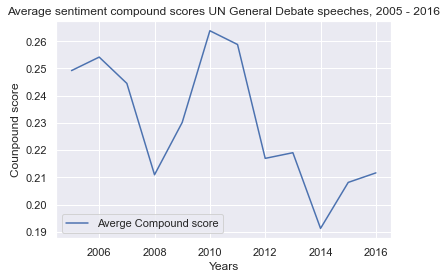

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots()
ax.plot(np.arange(2005, 2017), average_comp_score_2005_2016)
ax.legend(['Averge Compound score'])
plt.xlabel("Years")
plt.ylabel("Counpound score")
plt.title("Average sentiment compound scores UN General Debate speeches, 2005 - 2016")
plt.savefig('Compound_score.png')
plt.show()


In [22]:
# testing significant difference between positivity in 2007 and 2008
from scipy import stats

# #degrees of freedom = N1 + N2 -2
degrees = len(scores_2007) + len(scores_2008) -2

# # testing if significant difference in compound scores
stats.ttest_ind(scores_2007, scores_2008)


14136